<a href="https://colab.research.google.com/github/simonebugo/Big_Data/blob/main/simonebugo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

In [31]:
df = pd.read_csv('dataset.csv', sep =',')
df.head() #mostra solo le prime 5 righe. se metto head(10) le prime 10...

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


1.

In [5]:
print(f'Numero righe (istanze): {df.shape[0]}') #il numero di istanze è il numero di righe
print(f'Numero colonne: {df.shape[1]}') #numero di classi

Numero righe (istanze): 119390
Numero colonne: 32


In [6]:
df.isnull().sum() #il dataset non è completo, sono presenti missing values

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [7]:
df['is_canceled'].value_counts() #il dataset non è bilanciato, sono presenti molti più 0 che 1 nella classe is_cancelled

,count
is_canceled,
0,75166
1,44224


2.

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df["total_stay"] = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]

Text(0, 0.5, 'tariffa media')

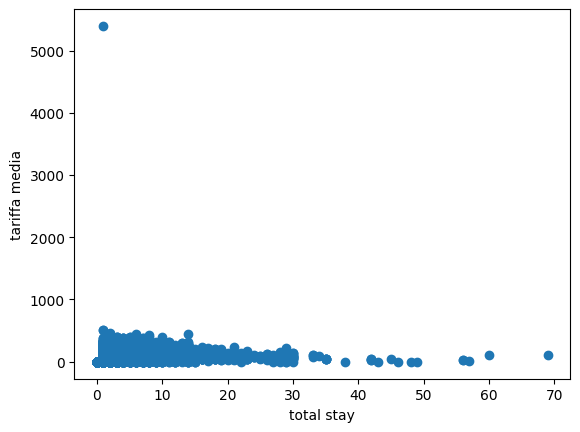

In [10]:
plt.scatter(df["total_stay"], df["adr"])
plt.xlabel("total stay")
plt.ylabel("tariffa media")

<Axes: xlabel='total_stay'>

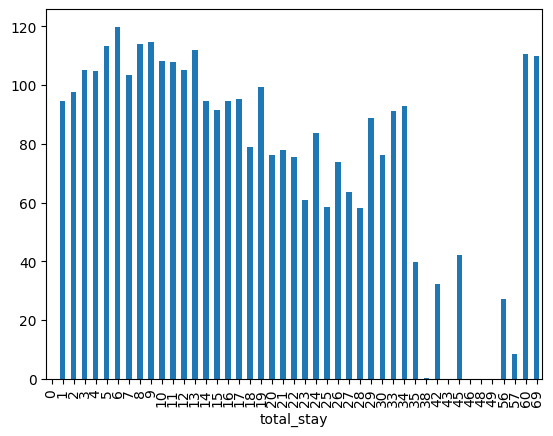

In [11]:
df.groupby('total_stay')['adr'].mean().plot(kind='bar')
#possiamo vedere che non c'è una vera e propria correlazione lineare, possiamo osservare che per total stay molto lunghi abbiamo comunque
#delle tariffe medie elevate

3.

In [32]:
new = df[(df['children'] > 0) | (df['babies'] > 0)]

In [33]:
new['tot_baby_child'] = new['children'] + new['babies']
new['lead_disc'] = pd.cut(new['lead_time'], bins=5)

new.pivot_table(index='lead_disc', columns='tot_baby_child', values='is_canceled', aggfunc='mean')

#non si può osservare che tendenzialmente al crescere del numero dei bambini e al crescere del lead time si abbassi la probabilità di cancellare

/tmp/ipython-input-4261189378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['tot_baby_child'] = new['children'] + new['babies']
/tmp/ipython-input-4261189378.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['lead_disc'] = pd.cut(new['lead_time'], bins=5)
/tmp/ipython-input-4261189378.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behav

tot_baby_child,1.0,2.0,3.0,9.0,10.0
lead_disc,,,,,
"(-0.424, 84.8]",0.239530,0.354982,0.256757,0.0,0.5
"(84.8, 169.6]",0.369650,0.486643,0.318182,NaN,NaN
"(169.6, 254.4]",0.407767,0.453975,0.272727,NaN,NaN
"(254.4, 339.2]",0.548000,0.592357,0.250000,NaN,NaN
"(339.2, 424.0]",0.421053,0.857143,NaN,NaN,NaN


4.

In [14]:
df.groupby('arrival_date_month')['is_canceled'].mean()

,is_canceled
arrival_date_month,
April,0.407972
August,0.377531
December,0.349705
February,0.334160
January,0.304773
July,0.374536
June,0.414572
March,0.321523
May,0.396658


In [15]:
df['month_mapped'] = df['arrival_date_month'].map({
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12})

<Axes: xlabel='month_mapped'>

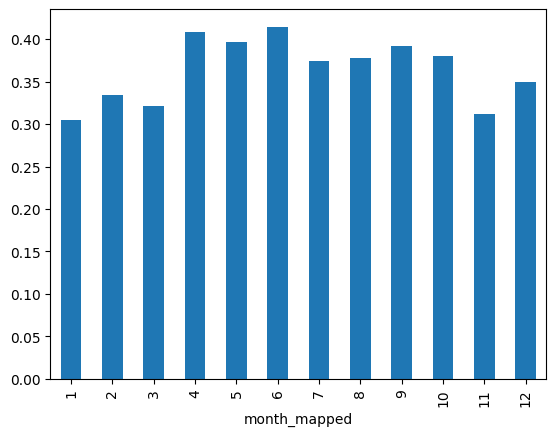

In [16]:
df.groupby('month_mapped')['is_canceled'].mean().plot(kind='bar')

-----------------------------------------
PARTE 2
-----------------------------------------

1.

In [18]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDRegressor, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import FeatureUnion
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import r2_score, mean_squared_log_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

In [29]:
df = pd.read_csv('dataset.csv', sep =',')
df.drop(['hotel','company','agent'],axis = 1,inplace = True) #il nome  e la compagnidell'hotel non contribuisce alla predizione, al contrario produce overfitting

dfn = df.isnull()
for cols in dfn.columns:
  if (dfn[cols] == True).sum() > (dfn.shape[0] / 2):
    df.drop(cols, axis = 1, inplace = True)

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

le = LabelEncoder() #fa una fit trasf solo per gli object. solo per colonne categoriche
for column in df.columns:
    if df[column].dtype == object:
        df[column] = le.fit_transform(df[column])

X = df.drop('is_canceled', axis = 1)
y = df['is_canceled'] #y è il target, test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [30]:
models = {'DecisionTree': DecisionTreeClassifier(),
          'KNeighborsClassifier': KNeighborsClassifier(),
          'DummyClassifier': DummyClassifier(strategy="most_frequent")}

def test_model(name, model, traindata, testdata, trainlabels, testlabels):
  model.fit(traindata, trainlabels)
  trainpred = model.predict(traindata)
  testpred = model.predict(testdata)
  print(f" ===== {name} =====")
  print(f"accuracy on train {accuracy_score(trainlabels,trainpred)}")
  print(f"accuracy on test {accuracy_score(testlabels,testpred)}")
  print(f"F1 on train {f1_score(trainlabels,trainpred)}")
  print(f"F1 on test {f1_score(testlabels,testpred)}")
  print(f"confusion matrix on train \n {confusion_matrix(trainlabels,trainpred)}")
  print(f"confusion matrix on test \n {confusion_matrix(testlabels,testpred)}")


for name, model in models.items():
  test_model(name, model, X_train, X_test, y_train, y_test)

 ===== DecisionTree =====
accuracy on train 1.0
accuracy on test 1.0
F1 on train 1.0
F1 on test 1.0
confusion matrix on train 
 [[47198     0]
 [    0 17987]]
confusion matrix on test 
 [[15733     0]
 [    0  5996]]
 ===== KNeighborsClassifier =====
accuracy on train 0.9020786990872133
accuracy on test 0.8595425468268213
F1 on train 0.8005374832036499
F1 on test 0.7087786259541985
confusion matrix on train 
 [[45993  1205]
 [ 5178 12809]]
confusion matrix on test 
 [[14963   770]
 [ 2282  3714]]
 ===== DummyClassifier =====
accuracy on train 0.724062284267853
accuracy on test 0.7240554098209766
F1 on train 0.0
F1 on test 0.0
confusion matrix on train 
 [[47198     0]
 [17987     0]]
confusion matrix on test 
 [[15733     0]
 [ 5996     0]]


considerazioni:
il decion tree performa al massimo delle possibilità, raggiunge accuracy e f1 score pari a 1 e osservando la confusion matrix ci accorgiamo che non compare alcun errore

per quanto riguarda il KNC le performance calano leggermente ma rimangono comunquq buone, accuracy abbondantemente sopra l'80% sia sul train che sul test e f1 discreto.

per quanto riguarda il dummy classifier si può osservare che l'accuracy è buona, il motivo è perchè la strategia adottata è il most frequent, ovvero la strategia in cui viene assegnata la classe più probabile ad ogni istanza, siccome il dataset è sbilanciato è buona. si possono però osservare le debolezze del modelo osservando l'f1 score (=0) e la confusion matrix

2.

In [21]:
df = pd.read_csv('dataset.csv', sep =',')
df.drop(['hotel','company','agent'],axis = 1,inplace = True) #il nome dell'hotel non contribuisce alla predizione, al contrario produce overfitting

dfn = df.isnull()
for cols in dfn.columns:
  if (dfn[cols] == True).sum() > (dfn.shape[0] / 2):
    df.drop(cols, axis = 1, inplace = True)

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

le = LabelEncoder() #fa una fit trasf solo per gli object. solo per colonne categoriche
for column in df.columns:
    if df[column].dtype == object:
        df[column] = le.fit_transform(df[column])

X = df.drop('is_canceled', axis = 1)
y = df['is_canceled'] #y è il target, test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [22]:
parameters = {
    'weights': ['uniform', 'distance'],
    'n_neighbors':[4,10]
}
#devi specificare refit quando si calcolano due metriche insieme.
gd_dt = GridSearchCV(KNeighborsClassifier(),
                     parameters,
                     scoring='f1',
                     cv=5,
                     n_jobs = 1)
gd_dt.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'n_neighbors': [4, 10],
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [23]:
best_par = gd_dt.best_params_
best_par

{'n_neighbors': 4, 'weights': 'distance'}

In [24]:
best_score = gd_dt.best_score_
best_score

np.float64(0.7334872300224717)

In [25]:
best_model = gd_dt.best_estimator_
y_test_pred_best = best_model.predict(X_test)
y_train_pred_best = best_model.predict(X_train)
print(f"f1 on train {f1_score(y_train, y_train_pred_best)}")
print(f"f1 on test {f1_score(y_test, y_test_pred_best)}")

#possiamo osservare che l'f1 sul training set aumenta devisamente ottenendo un valore pari a 1
#anche sul test set incrementa seppure meno vertiginosamente

f1 on train 1.0
f1 on test 0.7535755701584848


3.

In [27]:
df.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [24]:
df = pd.read_csv('dataset.csv', sep =',')
df.drop(['hotel','company','agent'],axis = 1,inplace = True)

dfn = df.isnull()
for cols in dfn.columns:
  if (dfn[cols] == True).sum() > (dfn.shape[0] / 2):
    df.drop(cols, axis = 1, inplace = True)

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

le = LabelEncoder() #fa una fit trasf solo per gli object. solo per colonne categoriche
for column in df.columns:
    if df[column].dtype == object:
        df[column] = le.fit_transform(df[column])

newdf = df[['customer_type','stays_in_weekend_nights','meal','lead_time','is_repeated_guest','is_canceled']]

X = newdf.drop('is_canceled', axis = 1)
y = newdf['is_canceled'] #y è il target, test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [25]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

#per ogni feature del dataset di test faccio una permutazinoe dei valori e vedo come variano le performacne se chiamo le predizioni del modello
#allenato precedentemente sul dataset con la feature permutata. questa permutazione la faccio 5 volte

feature_names = X_test.columns
n_permutations = 5
f1_scores = [] #lista in cui inserisco i risultati degli f1 score
importances = {} #inserisco qua la differenza tra il valore originali degli f1 e la media dei valori permutati

for feature in feature_names:
  #per ogni feature costruisco una lista di score siccome vado a calcolare 5 volte l'f1 score per ogni feature
    feature_scores = []
    f1_origin = f1_score(y_test, model.predict(X_test),average='weighted') #calcolo l'f1 score senza aver fatto permutazioni alla feature
    for _ in range(n_permutations): #faccio 5 permutazioni di una feature
        X_test_permuted = X_test.copy()
        X_test_permuted[feature] = np.random.permutation(X_test_permuted[feature]) #per ogni permutazione perumot i valori con questa funzione di np
        f1_permuted = f1_score(y_test, model.predict(X_test_permuted),average='weighted') #calcolo l'f1 score tra y_test (valori reali) e le perdizioni sulla feature permutata
        feature_scores.append(f1_permuted)
        #per ogni feature avrò 5 valori di f1 permutato
    f1_scores.append(feature_scores) #avrò quindi una matrice di n feature per 5 valori di ciascuna feautre
    importances[feature] = f1_origin - np.mean(f1_scores)

In [26]:
importance_df = (
    pd.DataFrame.from_dict(importances, orient="index", columns=["Importance"])
      .sort_values(by="Importance", ascending=False)
)

print("Ranking delle feature:")
print(importance_df)

print("\nLe 2 feature più importanti sono:")
print(importance_df.head(2))

Ranking delle feature:
                         Importance
lead_time                  0.020719
is_repeated_guest          0.016517
customer_type              0.015339
stays_in_weekend_nights    0.013098
meal                       0.011622

Le 2 feature più importanti sono:
                   Importance
lead_time            0.020719
is_repeated_guest    0.016517


4.

In [30]:
df = pd.read_csv('dataset.csv', sep =',')
df.drop(['hotel','company','agent'],axis = 1,inplace = True)

dfn = df.isnull()
for cols in dfn.columns:
  if (dfn[cols] == True).sum() > (dfn.shape[0] / 2):
    df.drop(cols, axis = 1, inplace = True)

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

le = LabelEncoder() #fa una fit trasf solo per gli object. solo per colonne categoriche
for column in df.columns:
    if df[column].dtype == object:
        df[column] = le.fit_transform(df[column])

X = df.drop('is_canceled', axis = 1)
y = df['is_canceled'] #y è il target, test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [32]:
col_tran = ColumnTransformer(
    transformers=[
        ('discr', KBinsDiscretizer(n_bins = 5), ["lead_time","adr"]),
        ('mimax', MinMaxScaler(),["total_of_special_requests"]),
        ],
    remainder='passthrough'#per lasciare invariati gli altri attributi
)
pipeline = Pipeline(steps=[
                              ('col_tran', col_tran),
                              ('estimator', KNeighborsClassifier(n_neighbors = 4, weights = 'distance')),
                             ])

pipeline

Pipeline(steps=[('col_tran',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('discr', KBinsDiscretizer(),
                                                  ['lead_time', 'adr']),
                                                 ('mimax', MinMaxScaler(),
                                                  ['total_of_special_requests'])])),
                ('estimator',
                 KNeighborsClassifier(n_neighbors=4, weights='distance'))])

In [33]:
pipeline.fit(X_train,y_train)
y_pred_pl_train = pipeline.predict(X_train)
y_pred_pl = pipeline.predict(X_test)
print(f"f1 score train: {f1_score(y_train,y_pred_pl_train):.4f}")
print(f"f1 score test: {f1_score(y_test,y_pred_pl):.4f}")
#l'f1 score sul training set rimane fisso a 1, menrte l'f1 score sul test set cresce ulteriormente

f1 score train: 1.0000
f1 score test: 0.8930


5.

In [34]:
parameters = {
    'combined_features__svd__n_components': [2, 4, 6]
}

combined_features = FeatureUnion([("svd", TruncatedSVD()), ("col_tran", col_tran)])

my_pipeline = Pipeline(steps=[('combined_features', combined_features),
                              ('estimator', KNeighborsClassifier(n_neighbors = 4, weights = 'distance')),
                             ]) #verbose = True) #verbose serve solo a farti vedere cosa sta succedendo mentre la pipeline viene eseguita.

gd = GridSearchCV(my_pipeline, parameters,scoring='f1')
gd.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(estimator=Pipeline(steps=[('combined_features',
                                        FeatureUnion(transformer_list=[('svd',
                                                                        TruncatedSVD()),
                                                                       ('col_tran',
                                                                        ColumnTransformer(remainder='passthrough',
                                                                                          transformers=[('discr',
                                                                                                         KBinsDiscretizer(),
                                                                                                         ['lead_time',
                                                                                                          'adr']),
                                                                                                        ('mimax',
                                                                                                         MinMaxScaler(),
                                                                                                         ['total_of_special_requests'])]))])),
                                       ('estimator',
                                        KNeighborsClassifier(n_neighbors=4,
                                                             weights='distance'))]),
             param_grid={'combined_features__svd__n_components': [2, 4, 6]},
             scoring='f1')

In [35]:
best_par = gd.best_params_
best_par

{'combined_features__svd__n_components': 2}

In [36]:
best_score = gd.best_score_
best_score

np.float64(0.8614794511733658)

In [37]:
best_model = gd.best_estimator_
y_test_pred_best = best_model.predict(X_test)
y_train_pred_best = best_model.predict(X_train)
print(f"f1 on train {f1_score(y_train, y_train_pred_best)}")
print(f"f1 on test {f1_score(y_test, y_test_pred_best)}")

#l'f1 score sul training set rimane fisso a 1, menrte l'f1 score sul test set cala leggermente

f1 on train 1.0
f1 on test 0.881093129179184


6.

In [38]:
df = pd.read_csv('dataset.csv', sep =',')
df.drop('hotel',axis = 1,inplace = True) #il nome dell'hotel non contribuisce alla predizione, al contrario produce overfitting

dfn = df.isnull()
for cols in dfn.columns:
  if (dfn[cols] == True).sum() > (dfn.shape[0] / 2):
    df.drop(cols, axis = 1, inplace = True)

df.drop_duplicates(inplace=True)

X = df.drop('is_canceled', axis = 1)
y = df['is_canceled'] #y è il target, test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [39]:
categorical_cols = [cname for cname in X_train.columns if
                    X_train[cname].dtype == "object"]

numerical_cols = [cname for cname in X_train.columns if
                X_train[cname].dtype in ['int64', 'float64']]

In [40]:
# Trasforma le colonne testuali in colonne binarie (0/1)
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), #non esiste il mean su colonne categoriche, di default la strategia è il mean
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Gestisce i nulli per le colonne numeriche
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# --- 3. ColumnTransformer ---
coltran = ColumnTransformer(transformers=[
    ("cat", cat_transformer, categorical_cols),
    ("num", num_transformer, numerical_cols)
])

# --- 4. Pipeline Finale ---
pipeline = Pipeline(steps=[
    ("preprocessing", coltran),
    ("scaler", StandardScaler()),
    ('estimator', KNeighborsClassifier())
])
pipeline


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['arrival_date_month', 'meal',
                                                   'country', 'market_segment',
                                                   'distribution_channel',
                                                   'reserved_room_type',
                                                   'assigned_room_type',
                                                   'deposit_type',
                                                   'c...
                                                   'arrival_date_day_of_month',
                                                   'stays_in_weekend_nights',
                                                   'stays_in_week_nights',
                                                   'adults', 'children',
                                                   'babies',
                                                   'is_repeated_guest',
                                                   'previous_cancellations',
                                                   'previous_bookings_not_canceled',
                                                   'booking_changes', 'agent',
                                                   'days_in_waiting_list',
                                                   'adr',
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requests'])])),
                ('scaler', StandardScaler()),
                ('estimator', KNeighborsClassifier())])

In [ ]:
pipeline.fit(X_train,y_train)
y_pred_pl_train = pipeline.predict(X_train)
y_pred_pl = pipeline.predict(X_test)
print(f"f1 score train: {f1_score(y_train,y_pred_pl_train):.4f}")
print(f"f1 score test: {f1_score(y_test,y_pred_pl):.4f}")